# Linear Regression using Gradient Descent

We want to solve linear regression using Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

# Part 0: getting the data

**Remark about the data**: here, we work with a **toy example** where the data is generated from a linear relationship + some noise. So, we can actually read the true value of the coefficients. 

But of course, **in real life, you do not have access** to the true model which generated the data, and certainly not access to its parameters either !

#### We help you create the data

In [2]:
def createData(N,theta0,theta1,sigmaNoise): 
    Xrange = 10
    D = 1
    ## x are random
    X = np.random.random((N,D))*Xrange   
    ## the "y" (ordinates axis) are y=a.x+b + noise
    noise = np.random.normal(0,sigmaNoise, (N,D))
    y = theta0 + theta1*X + noise   # not available in real life

    # for your numpy education, here is another method to create the data:
    theta = np.array([theta0, theta1]).reshape((2,1))
    Xaugmented = np.hstack((np.ones((N,1)) , X )) # this 1 is really a 1, not a D !
    y2 = (Xaugmented @ theta) + noise
    
    print("difference in the 2 methods:",  (abs(y-y2)).sum()  ) # we then check that this prints ~0
    
    return X, y

difference in the 2 methods: 0.0
difference in the 2 methods: 0.0


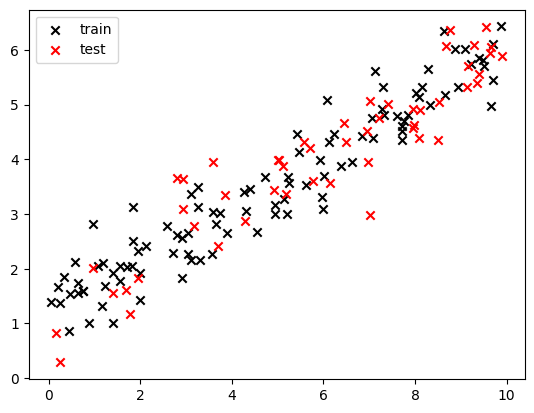

In [3]:
######### data creation #########
seed=42
np.random.seed(seed)
N=100
theta0=1.1                                                         # not available in real life
theta1=0.5                                                         # not available in real life
sigmaNoise = 0.5                                                   # not available in real life
X, y = createData(N,theta0,theta1,sigmaNoise) ## training data 
Ntest=N//2
Xtest, ytest = createData(Ntest,theta0,theta1,sigmaNoise) ## test data

####### data visualization ###########
plt.figure()
plt.scatter(X,y, label="train", marker='x',color='k')
plt.scatter(Xtest,ytest, label= "test", marker='x',color='red')
plt.legend()

In [4]:
thetaGT = np.array([theta0, theta1])

X_aug = np.hstack([np.ones((N, 1)), X])
Xtest_aug = np.hstack([np.ones((Ntest, 1)), Xtest])

y = y.squeeze()
ytest = ytest.squeeze()

# Part 1: handcrafted model

## 1. Model defintion, initalization

- create a model, i.e. a function $f_\Theta(x)$
- choose hyper-parameters `eta`, `MaxIter`, and set the dimension of data `D` appropriately (if you have no idea, put a stupid thing to start, you'll make it better later. Ask around, also ! This is not very important for now).
- make a stupid or random guess for an initial value of the parameters vector `theta`, i.e. for `thetaInitial`

In [5]:
model = lambda theta, X: X @ theta

In [6]:
#### hyper-parameters #####
eta = .01
MaxIter = 500
D = 1

In [7]:
## initialization (in a sense, a hyper-parameter)
thetaInitial = np.array([-0.32679813, -0.06614835])

### Remark about the auxiliary ones trick:

If you prefer to write things using the trick of augmented X, to use more matrix operations, 
- you're right !
- go see the d-dimensional case, where the data X is defined with its augmented component (filled with ones)

But if you prefer not to, for now, it's ok.

## 2. Update rule

### Now the crucial part 

- **take a piece of paper and a pencil, and derive the update rule for your function $f_\Theta(x)$**, according to the method of Grandient Descent. Really do it on paper, not on the computer !!
Use the Mean Squared Error Loss.

### Now to code it

- implement a function `fit(model, eta, MaxIter, D, theta, X, y)` that will update the parameters according to gradient descent
- run it !
- add a recording of train and test error to your fit function, so as to keep track of train and test error at all iterations of the algorithm

In [8]:
loss = lambda y_pred, y: np.linalg.norm(y_pred - y, axis=0) ** 2 / len(y) 
grad = lambda theta, X, y: 2 / N * (model(theta, X) - y) @ X

def verif_grad(f, grad, theta0, X, y): 
    z = np.copy(y).reshape((-1, 1))
    return abs((loss(model(theta0 + 1e-8*np.eye(len(theta0)), X), z) - loss(model(theta0 * np.eye(len(theta0)), X), z)) / 1e-8 - grad(theta0, X, y)).all()
    
    
assert verif_grad(loss, grad, thetaInitial, X_aug, y)

In [9]:
def fit(model, eta, MaxIter, D, theta0, X, y, Xtest, ytest, loss=loss, grad=grad):
    grad_ = lambda theta: grad(theta, X, y)
    
    theta = np.copy(theta0)
    train_loss, test_loss = [], []
    
    iter_ = 0
    while (iter_ := iter_ + 1) <= MaxIter and np.linalg.norm((d := -grad_(theta))) > 1e-8:
        theta += eta * d
        
        train_loss.append(loss(model(theta, X), y))
        test_loss.append(loss(model(theta, Xtest), ytest))
        
    return theta, np.array(train_loss), np.array(test_loss)

In [10]:
theta, train_loss, test_loss = fit(model, eta, MaxIter, D, thetaInitial, X_aug, y, Xtest_aug, ytest)

err = np.linalg.norm(theta - thetaGT)

print("Après %d itérations, erreur de %e" % (len(train_loss),  err))

Après 500 itérations, erreur de 2.187922e-02


In [11]:
theta

array([1.11971453, 0.49051121])

## 3. Training the model, testing the trained model

### Follow the results 

- plot the data (train and test), the initial guess, and the final model (all 4 things on a single graph).
- on a separate plot, show the *training error* and *test errror* evolution over the iterations (epochs)

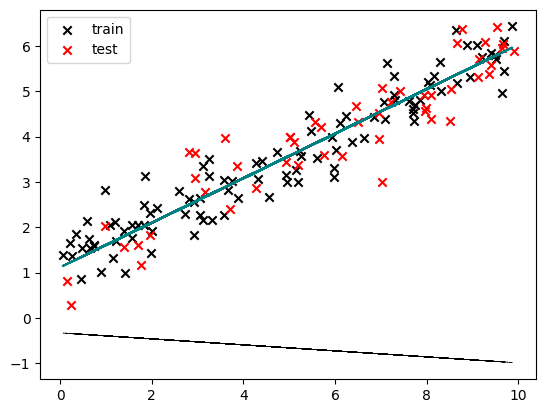

In [12]:
## plot the data, the noiseless-teacher, the model that was learned
plt.figure(1)

plt.scatter(X, y, label="train", marker='x',color='k')
plt.scatter(Xtest, ytest, label= "test", marker='x',color='red')

plt.plot(X, model(thetaInitial, X_aug), ls="-.", lw=.5, color='k')
plt.plot(X, model(theta, X_aug), color='teal')

plt.legend()

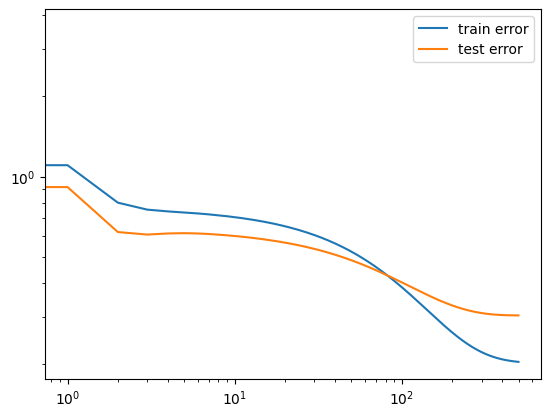

In [13]:
## follow the evolution of train and test accuracy or error
plt.figure(2)
plt.loglog(train_loss, label='train error')
plt.loglog(test_loss, label='test error')
plt.legend()

# Part 2: sklearn solution

## Comparing with the sklearn implementation

We can now cheat using `sklearn`, to check wether our results are consistent with it (they will often be *slightly*  different!)

In [14]:
## check these lines at home   ##
import sklearn
from sklearn import datasets

from sklearn.linear_model import LinearRegression
reg_sklearn_object = sklearn.linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)
Xreshaped = X.reshape((N,1))
reg_sklearn_object.fit(Xreshaped,y)
print("coeffs fitted by sklearn: ", reg_sklearn_object.coef_, reg_sklearn_object.intercept_)

Xtest_resh = Xtest.reshape((Ntest,1))
print(reg_sklearn_object.score(Xreshaped, y))
print(reg_sklearn_object.score(Xtest_resh, ytest))

coeffs fitted by sklearn:  [0.47701134] 1.2075480787733728
0.9081437156468248
0.8597536205958003


In [15]:
theta_sklearn = np.array([reg_sklearn_object.intercept_, reg_sklearn_object.coef_[0]])

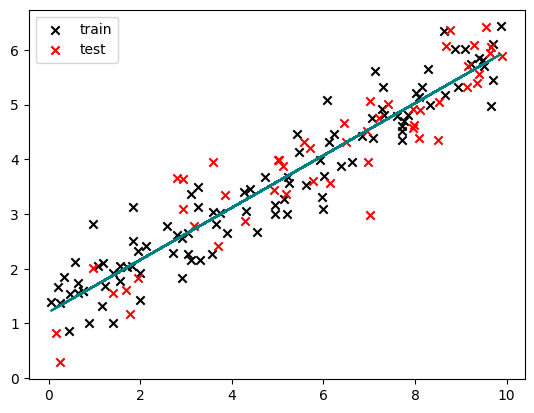

In [16]:
## plot the data, the noiseless-teacher, the model that was learned
plt.figure(1)
plt.scatter(X,y, label="train", marker='x',color='k')
plt.scatter(Xtest,ytest, label= "test", marker='x',color='red')
plt.plot(X, model(theta_sklearn,X_aug), color='teal')
plt.legend()

---------------- 
# (optional) $d$-dimensional input

### This is Optional Homework

-> See TP1.2 for some help to start on this

In [17]:
def create_d_d_Data(N,thetas,D,sigmaNoise): 
    Xrange = 10
    ## x are random
    X = np.random.random((N,D+1))*Xrange   
    X [:,0] = 1 # as if we stacked ones to a (N,D)-sized array of X
    ## the "y" (ordinates axis) are y=a.x+b + noise
    y = X @ thetas + np.random.normal(0,sigmaNoise,  N)      # not available in real life
    return X, y

In [18]:
######### data creation #########
seed=42
np.random.seed(seed)
N = 50
D = 6 # for instance, D=6
thetaGT=np.random.random(D+1)                                  # not available in real life
sigmaNoise = 0.5                                                   # not available in real life
X, y = create_d_d_Data(N,thetaGT,D,sigmaNoise)                     # not available in real life
Ntest=N*2
Xtest, ytest = create_d_d_Data(Ntest,thetaGT,D,sigmaNoise) ## test data

In [19]:
X.shape, y.shape

((50, 7), (50,))

In [20]:
# the first component of X is always a 1.
X[:3]

array([[1.        , 6.01115012, 7.08072578, 0.20584494, 9.69909852,
        8.32442641, 2.12339111],
       [1.        , 1.8340451 , 3.04242243, 5.24756432, 4.31945019,
        2.9122914 , 6.11852895],
       [1.        , 2.92144649, 3.66361843, 4.56069984, 7.85175961,
        1.99673782, 5.14234438]])

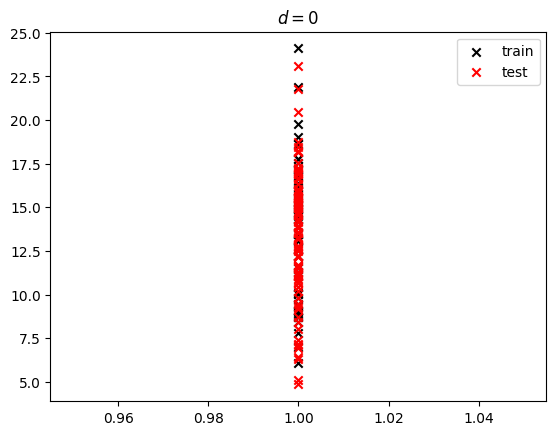

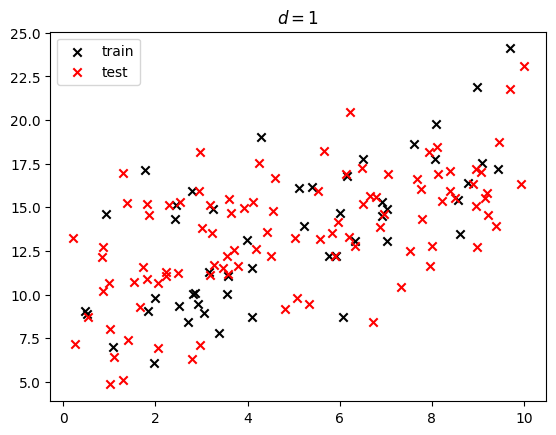

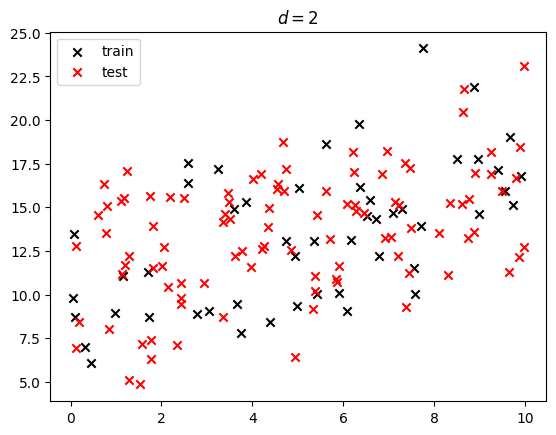

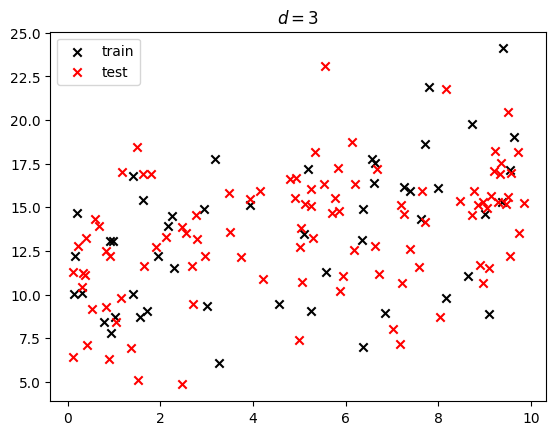

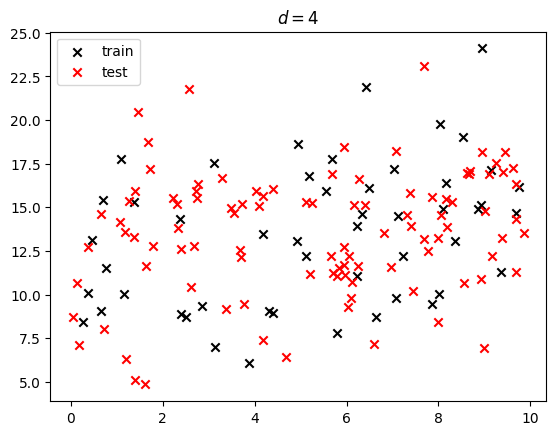

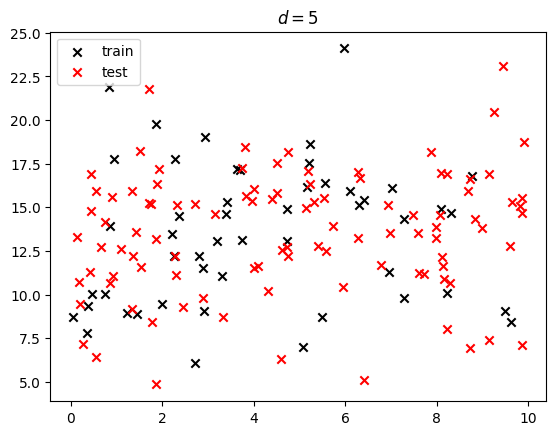

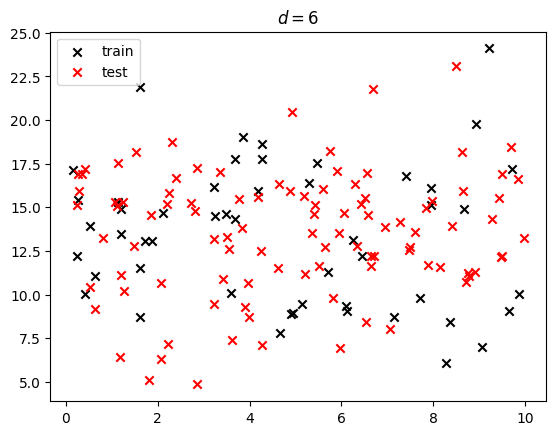

In [21]:
####### data visualization ###########
for d in range (D+1):
    plt.figure()
    plt.title('$d=$'+str(d))
    plt.scatter(X[:,d],y, label="train", marker='x',color='k')
    plt.scatter(Xtest[:,d],ytest, label= "test", marker='x',color='red')
    plt.legend()

In [22]:
eta = .001
MaxIter = 10_000

thetaInitial = np.random.randn(D+1) - 0.5

y, ytest = y.squeeze(), ytest.squeeze()

theta, train_loss, test_loss = fit(model, eta, MaxIter, D, thetaInitial, X, y, Xtest, ytest)

err = np.linalg.norm(theta - thetaGT)

print("Après %d itérations, erreur de %e" % (len(train_loss),  err))

Après 10000 itérations, erreur de 3.101705e-01


In [23]:
thetaGT

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361])

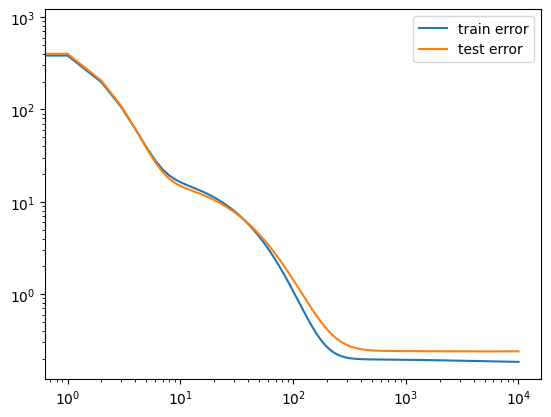

In [24]:
plt.loglog(train_loss, label= "train error")
plt.loglog(test_loss, label= "test error")
plt.legend()

In [25]:
theta / thetaGT    ,    theta - thetaGT

(array([1.81168331, 1.02742694, 0.97576765, 0.92709276, 0.91369258,
        1.13656215, 0.72769031]),
 array([ 0.30400796,  0.02607519, -0.01773794, -0.04364654, -0.01346557,
         0.02130295, -0.01581673]))

---------------- 
# (optional) Polynomial regression

### Optional Homework: do the same, but using a 3-rd order polynomial (in data generation, and in your model) 

(advice: keep a $D=1$ input)

-> See TP1.3 for some help to start on this

-> We'll see a smarter trick to do that (aka Kernels/feature maps) later in the course.

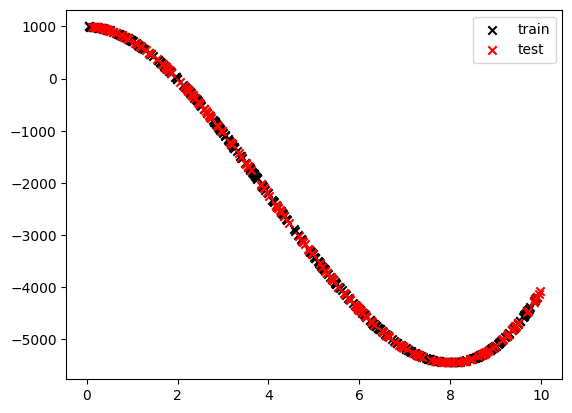

In [26]:
def createData3rdOrder(N,theta,sigmaNoise):
    Xrange = 10
    ## x are random
    X = np.random.random(N)*Xrange
    ## the "y" (ordinates axis) are y=a.x+b + noise
    y = theta[0] + theta[1]*X +theta[2]*X**2+theta[3]*X**3 + np.random.normal(0,sigmaNoise, N)
    return X, y

######### data creation #########
seed=42
np.random.seed(seed)
N=400
thetaGT=np.array([1000, -5, -300, 25])
sigmaNoise = 0.5
X, y = createData3rdOrder(N,thetaGT,sigmaNoise) ## training data 
Ntest=N//2
Xtest, ytest = createData3rdOrder(Ntest,thetaGT,sigmaNoise) ## test data

####### data visualization ###########
plt.figure()
plt.scatter(X,y, label="train", marker='x',color='k')
plt.scatter(Xtest,ytest, label= "test", marker='x',color='red')
plt.legend()

In [27]:
D = 3
X_poly = np.vander(X, D+1, increasing=True)
Xtest_poly = np.vander(Xtest, D+1, increasing=True)

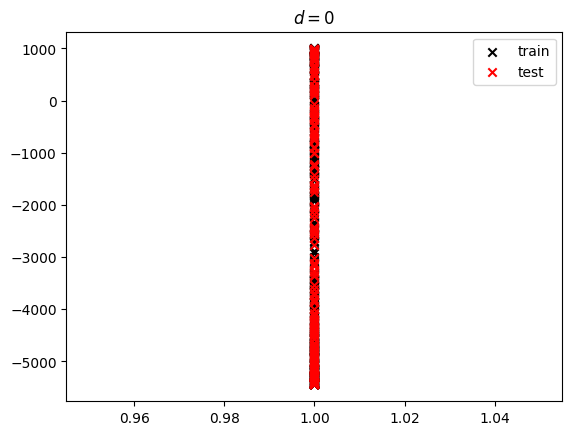

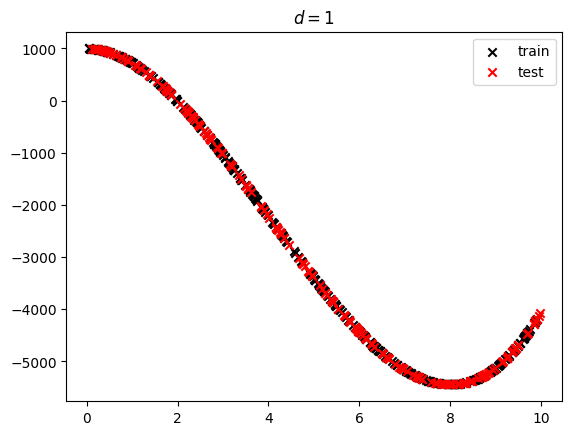

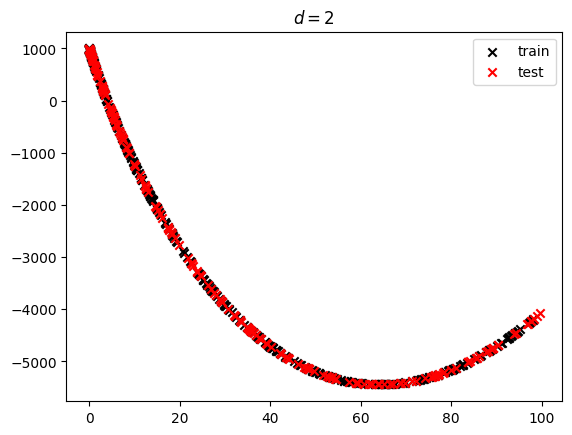

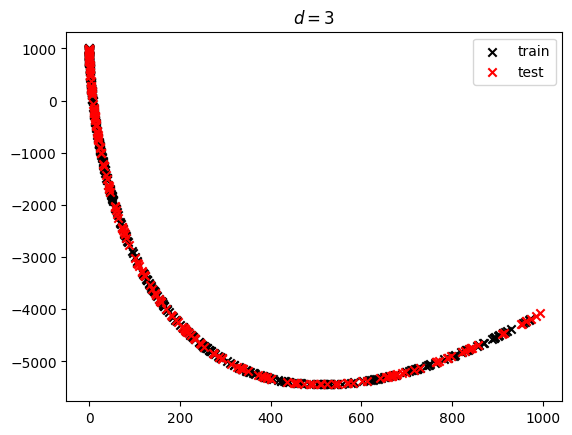

In [28]:
for d in range (D+1):
    plt.figure()
    plt.title('$d=$'+str(d))
    plt.scatter(X_poly[:,d],y, label="train", marker='x',color='k')
    plt.scatter(Xtest_poly[:,d],ytest, label= "test", marker='x',color='red')
    plt.legend()

In [29]:
thetaInitial

array([ 0.74920177, -0.00859543, -1.5307175 , -0.54976651, -0.12502206,
       -1.25739952, -1.8582712 ])

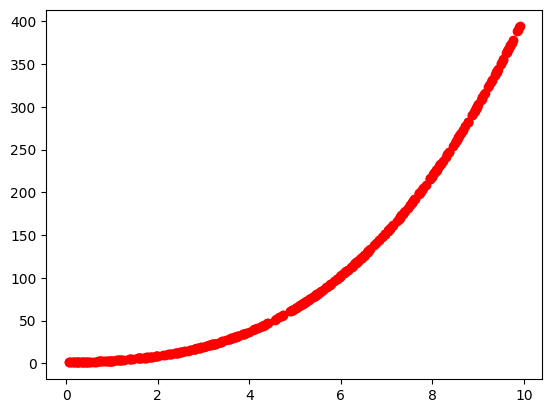

In [30]:
thetaInitial = np.eye(D+1, 2)[:, 1] + np.random.random(D+1)

plt.scatter(X, model(thetaInitial, X_poly), color='red')

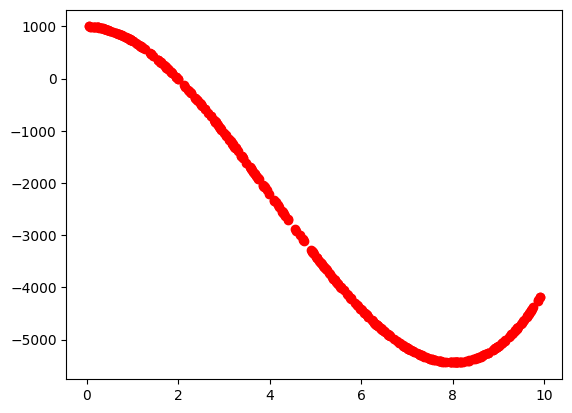

In [31]:
plt.scatter(X, model(thetaGT, X_poly), color='red')

In [43]:
#### hyper-parameters #####
eta=7e-6 # learning rate 
MaxIter = 1_000_000

theta, train_loss, test_loss = fit(model, eta, MaxIter, D, thetaInitial, X_poly, y, Xtest_poly, ytest)

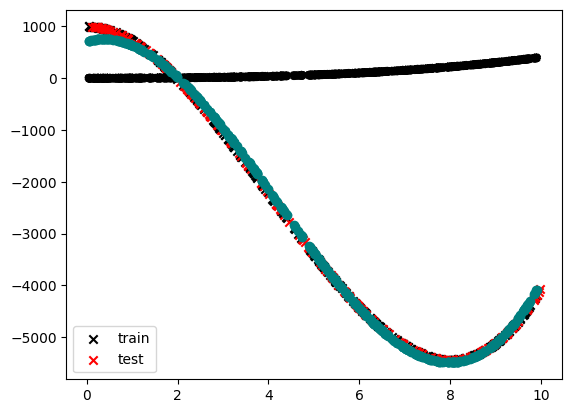

In [44]:
## plot the data, the noiseless-teache, the model that was learned
plt.figure(1)

plt.scatter(X, y, label="train", marker='x',color='k')
plt.scatter(Xtest, ytest, label= "test", marker='x',color='red')

plt.scatter(X, model(thetaInitial, X_poly), ls="-.", lw=.5, color='k')
plt.scatter(X, model(theta, X_poly), color='teal')

plt.legend()

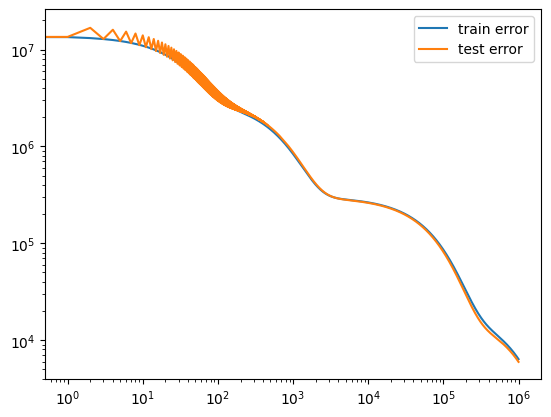

In [45]:
plt.loglog(train_loss, label= "train error")
plt.loglog(test_loss, label= "test error")
plt.legend()